In [7]:
%pip install huggingface-hub bitsandbytes accelerate datasets transformers

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip uninstall transformers -y
%pip install --upgrade transformers==4.30.2

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached tokenizers-0.13.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4
ERROR: Could not install packages due to an EnvironmentError: [Errno 16] Device or resource busy: '.nfs000000004a1ef52600001bab'

Note: you may need to restart the kernel to use updated packages.


# Energy

In [8]:
path = "/Users/oniichan/Documents/Class/Projects/TimeSeries/multivariate-time-series-data-master/solar-energy/solar_AL.txt"

In [1]:
import psutil
import os

process = psutil.Process(os.getpid())
print(psutil.virtual_memory().total / (1024**3))

503.5796928405762


In [9]:
# load into df
import pandas as pd
df = pd.read_csv(path, sep=",", header=None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(7200720,)


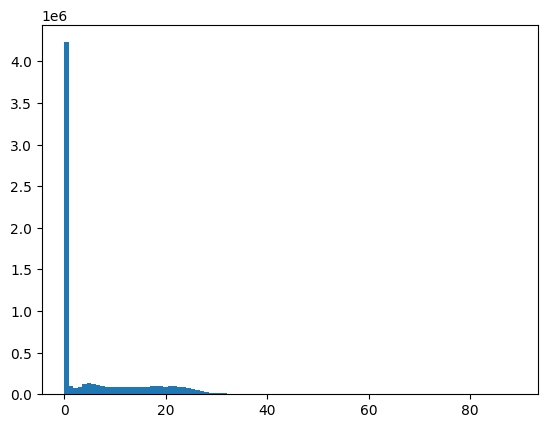

In [10]:
# flatten into 1D array
data = df.values.flatten()
print(data.shape)

# plot as histogram
import matplotlib.pyplot as plt
plt.hist(data, bins=100)
plt.show()

# Currency

In [1]:
path = "exchange_rate.txt"

In [2]:
# load into df
import pandas as pd

cols = "Australia, British, Canada, Switzerland, China, Japan, New Zealand, Singapore".split(", ")

df = pd.read_csv(path, sep=",", header=None)
df.columns = cols
display(df.head())
print(df.shape)


,Australia,British,Canada,Switzerland,China,Japan,New Zealand,Singapore
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


(7588, 8)


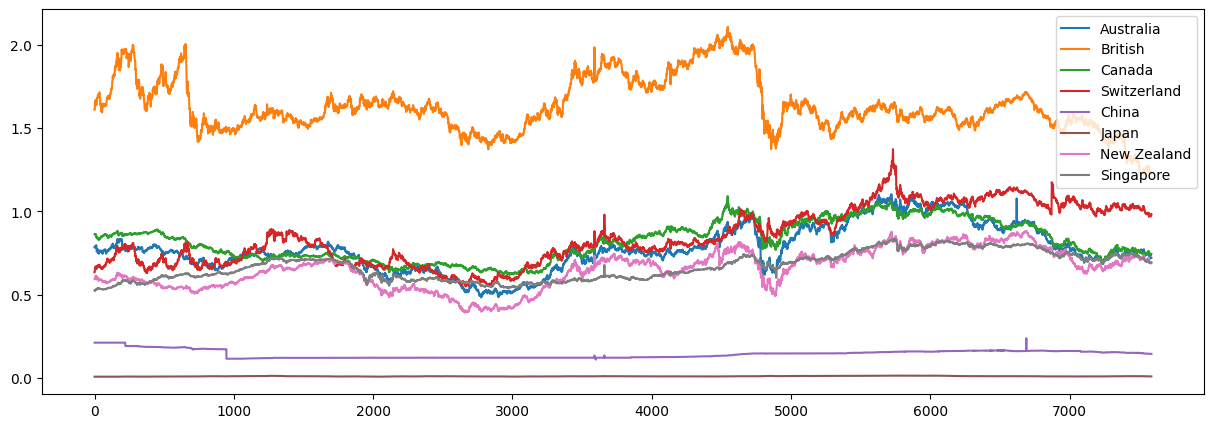

In [3]:
# plot as time series
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

In [4]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import numpy as np

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set padding token
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))
model.config.pad_token_id = model.config.eos_token_id

# get first col of df
# Convert to numpy array and normalize to 0-255 range
arr = df["Australia"].values
normalized = ((arr - arr.min()) * len(tokenizer.get_vocab()) / (arr.max() - arr.min()))#.astype(np.longlong)

print("Original:", arr)
# print("Encoded:", normalized.tobytes())

input_ids = torch.Tensor(normalized[:99]).long().unsqueeze(0)
print(input_ids.shape)
# print(len(tokenizer.get_vocab()))
# # Prepare input text
# text = "Replace me by any text you'd like. test lets add more text, does this make it bigger"
# input_ids = tokenizer.encode(text, return_tensors='pt')
# print(input_ids.shape)

# Generate text
output_sequences = model.generate(
    input_ids,
    max_length=100,  # Maximum length of output sequence
    num_return_sequences=1,  # Number of sequences to generate
    no_repeat_ngram_size=2,  # Prevent repetition of n-grams
    temperature=0.7,  # Controls randomness (higher = more random)
    pad_token_id=tokenizer.eos_token_id,
    eos_token_id=tokenizer.eos_token_id,
)

print(output_sequences.shape, output_sequences[0])

# Decode and print the generated text
generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
print(generated_text)

/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Original: [0.7855   0.7818   0.7867   ... 0.723197 0.720825 0.720825]
torch.Size([1, 99])
torch.Size([1, 100]) tensor([24526, 24226, 24623, 24567, 24477, 24615, 24778, 24972, 25208, 24843,
        25029, 25224, 25175, 25330, 23682, 22635, 22319, 22497, 22741, 22943,
        23146, 23284, 23552, 22903, 22984, 22254, 22010, 21588, 21815, 21815,
        21296, 21645, 22189, 22416, 22343, 22830, 22879, 22862, 22497, 22465,
        22741, 22424, 22335, 22546, 22424, 22513, 22513, 22294, 22538, 22741,
        22156, 21937, 22043, 22172, 21807, 21677, 21434, 21393, 21255, 21410,
        21832, 22034, 22140, 22497, 23017, 22862, 22862, 22700, 22806, 22968,
        22968, 22862, 22895, 22887, 23268, 23528, 23309, 22903, 22968, 22943,
        22132, 21669, 21645, 21296, 21807, 22067, 22018, 22172, 22270, 22335,
        22351, 22457, 23017, 22822, 22659, 22594, 22497, 22781, 22781,    50])
 ATK PepLeague Highlander vulirementMartin gradual ½ Apache whisperedた successive radically successes delega

/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


# Stuff

In [ ]:
from huggingface_hub import login
# TODO cant paste
login()

In [ ]:
from huggingface_hub import HfApi
api = HfApi()
# This will raise an error if you're not properly logged in
whoami = api.whoami()
print(f"Logged in as: {whoami.name}")

In [1]:
import os
with open('secrets.txt', 'r') as f:
    os.environ["HUGGINGFACE_TOKEN"] = f.read().strip()

FileNotFoundError: [Errno 2] No such file or directory: 'secrets.txt'

In [7]:
import torch
import os

print(torch.cuda.is_available())
print(torch.backends.mps)

if torch.cuda.is_available():
    device = torch.device('cuda')
    # get number of cuda devices
    print(f"devices: {torch.cuda.device_count()}")
    print(f"device:  {torch.cuda.get_device_name()}")
    print(f"device0: {torch.cuda.get_device_properties(0)}")
    print(f"{torch.cuda.memory_summary()}")
elif torch.backends.mps is not None:
    device = torch.device('mps')
    print(f"{torch.mps.current_allocated_memory()}")
    os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
else:
    device = torch.device('cpu')
    # print a warning that cpu is being used
    print("Warning: Running on CPU. This will be slow.")
print(f"{device}")

False
<module 'torch.backends.mps' from '/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/torch/backends/mps/__init__.py'>
11607710464
mps


In [9]:
from pathlib import Path
import numpy as np
import pickle
import pandas as pd

def prepare_training_data(model, input_files, output_dir, stride=256, window=None):
    """
    Prepare dataset for GPT-2 fine-tuning with sliding window approach.
    
    Args:
        input_files (list): List of text file paths
        output_dir (str): Directory to save processed data
        max_length (int): Maximum sequence length
        stride (int): Stride for sliding window
    """
    output_dir = Path(output_dir)
    output_dir.mkdir(exist_ok=True)

    if hasattr(model.config, 'max_position_embeddings'):
        print("max_position_embeddings")
        max_length = model.config.max_position_embeddings
    elif hasattr(model.config, 'max_sequence_length'):
        print("max_sequence_length")
        max_length = model.config.max_sequence_length
    elif hasattr(model.config, 'n_positions'):
        print("n_positions")
        max_length = model.config.n_positions
    elif hasattr(model.config, 'max_length'):
        print("max_length")
        max_length = model.config.max_length

    if window is not None:
        max_length = window

    print(f"Max length: {max_length}")
    print(f"Vocab size: {model.config.vocab_size}")
    
    dataset = []
    
    for file_path in input_files:
        eos = model.config.vocab_size - 1
        # max_length = model.config.n_positions

        print(f"Processing {file_path}")
        # Tokenize full text
        df = pd.read_csv(file_path, header=None, skiprows=1)
        # cols = "Australia, British, Canada, Switzerland, China, Japan, New Zealand, Singapore".split(", ")
        # df.columns = cols
        # arr = df["Australia"].values
        # drop any columns with nan
        df = df.dropna(axis=1)
        # drop any columns with str
        df = df.drop(df.select_dtypes(['object']), axis=1)

        # normalize all data from 0 to vocab size
        # TODO should i normalize each column separately?
        norm_df = (df - df.min()) * (model.config.vocab_size-2) / ( df.max() - df.min() )

        # add column at end with eos token
        norm_df["eos"] = eos

        n_cols = 1#norm_df.shape[1]

        tokens = norm_df.values.flatten().astype(int)
        # TODO get the byte size

        # tokens = tokenizer.encode(text)
        # need vocab-1 to avoid all funnyness with cuda
        # tokens = ((arr - arr.min()) * (len(tokenizer.get_vocab())-2) / (arr.max() - arr.min())).astype(int)
        
        # Create sequences with sliding window
        samples = 0
        for i in range(0, len(tokens) - max_length, stride):
            sequence = tokens[i:i + max_length]
            if len(sequence) == max_length:
                input_sequence = np.array(sequence[:-n_cols])#, dtype=np.int64) # dont include the last token
                target_sequence = np.array(sequence[n_cols:])#, dtype=np.int64) # dont include the first token
                
                # input_sequence = np.pad(input_sequence, (0, max_length - len(input_sequence)), mode='constant', constant_values=eos)
                # target_sequence = np.pad(target_sequence, (0, max_length - len(target_sequence)), mode='constant', constant_values=eos)
                
                dataset.append({
                    'input_ids': input_sequence,
                    'labels': target_sequence
                })
            samples += 1
            if samples > 512: # 1024
                print('max samples from file')
                break

    # pickle dataset

    # get memory usage of dataset
    import psutil
    process = psutil.Process(os.getpid())
    
    print(f"Created {len(dataset)} training examples")
    print(dataset[0])
    return dataset

In [10]:
import torch
from torch.utils.data import Dataset
from pathlib import Path

# get all files in the directory raw_data
input_files = [str(file) for file in Path('raw_data').glob('00*.csv')]
# input_files = ['exchange_rate.txt']
output_dir = 'processed_data'

class GPTDataset(Dataset):
    def __init__(self, model, stride=128, window=None, files=None):
        if files == None:
            files = input_files
        self.data = prepare_training_data(model, files, output_dir, stride=stride, window=window)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = self.data[idx]
        
        # print(item['input_ids'].shape, item['labels'].shape, torch.ones_like(torch.tensor(item['input_ids'])).shape)
        
        return {
            'input_ids': torch.tensor(item['input_ids']).to(device),
            'labels': torch.tensor(item['labels']).to(device),
            'attention_mask': torch.ones_like(torch.tensor(item['input_ids'])).to(device)
        }

In [4]:
from transformers import Trainer, TrainingArguments, AutoModelForCausalLM
import time

def train_model(model_name, output_dir, epochs=3, batch_size=4, stride=64, window=None):
    # Initialize model
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        # token=os.environ["HUGGINGFACE_TOKEN"]
    ).to(device)
    output_dir = Path(output_dir) / model_name / time.strftime("%y-%m-%d_%H")

    import psutil
    process = psutil.Process(os.getpid())
    print(f"model: Memory usage: {process.memory_info().rss / (1024**3)} GB")
    
    # Prepare dataset
    dataset = GPTDataset(model, stride=stride, window=window)

    import psutil
    process = psutil.Process(os.getpid())
    print(f"dataset: Memory usage: {process.memory_info().rss / (1024**3)} GB")
    
    # Training arguments
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=epochs,
        per_device_train_batch_size=batch_size,
        save_steps=500,
        save_total_limit=2,
        logging_steps=100,
        learning_rate=5e-5,
        dataloader_pin_memory=False,
    )
    
    # Initialize trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset,
    )
    
    # Train and save
    trainer.train()
    model.save_pretrained(output_dir)

In [6]:
train_model(
    model_name='gpt2',
    output_dir='models',
    epochs=3,
)

/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model: Memory usage: 3.485595703125 GB
max_position_embeddings
Max length: 1024
Vocab size: 50257
Processing raw_data/003_christmas.csv
max samples from file
Processing raw_data/005_city-temperature.csv


/var/folders/8v/kyhpjx6d3y1b7dp0twz_83sw0000gn/T/ipykernel_87332/1065694498.py:46: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)


max samples from file
Processing raw_data/001_time.csv
max samples from file
Processing raw_data/000_periodic.csv
Processing raw_data/004_electricityConsumptionAndProductioction.csv
max samples from file
Processing raw_data/001_sine.csv
Processing raw_data/000_count-10.csv
Processing raw_data/004_banana.csv
Processing raw_data/004_city-temperature.csv
max samples from file
Processing raw_data/002_xyz.csv
max samples from file
Processing raw_data/004_apricot.csv
Processing raw_data/002_polyrow.csv
Processing raw_data/004_apple.csv
Processing raw_data/003_halloween.csv
max samples from file
Processing raw_data/000_combined.csv
max samples from file
Processing raw_data/003_football.csv
max samples from file
Processing raw_data/000_arithmetic.csv
Processing raw_data/002_time.csv
max samples from file
Processing raw_data/001_xy.csv
max samples from file
Processing raw_data/002_quadratic.csv
Processing raw_data/001_sine-comb.csv
Processing raw_data/000_mul.csv
Processing raw_data/001_countin

  0%|          | 0/6687 [00:00<?, ?it/s]

{'loss': 4.1367, 'grad_norm': 18.808568954467773, 'learning_rate': 4.925228054433977e-05, 'epoch': 0.04}
{'loss': 3.0171, 'grad_norm': 6.856387138366699, 'learning_rate': 4.850456108867953e-05, 'epoch': 0.09}
{'loss': 2.7686, 'grad_norm': 8.660552978515625, 'learning_rate': 4.7756841633019294e-05, 'epoch': 0.13}
{'loss': 2.2843, 'grad_norm': 2.2398927211761475, 'learning_rate': 4.7009122177359054e-05, 'epoch': 0.18}
{'loss': 2.2508, 'grad_norm': 5.423144340515137, 'learning_rate': 4.626140272169882e-05, 'epoch': 0.22}
{'loss': 2.0939, 'grad_norm': 2.4616851806640625, 'learning_rate': 4.5513683266038586e-05, 'epoch': 0.27}
{'loss': 1.9619, 'grad_norm': 3.701845407485962, 'learning_rate': 4.4765963810378345e-05, 'epoch': 0.31}
{'loss': 2.0757, 'grad_norm': 2.3005363941192627, 'learning_rate': 4.401824435471811e-05, 'epoch': 0.36}
{'loss': 1.7685, 'grad_norm': 3.8441474437713623, 'learning_rate': 4.327052489905787e-05, 'epoch': 0.4}
{'loss': 1.7685, 'grad_norm': 3.439333438873291, 'learni

KeyboardInterrupt: 

In [5]:
train_model(
    # model_name='google/gemma-2b',
    # model_name='google/gemma-2-2b',
    # model_name='TinyLlama/TinyLlama-1.1B-Chat-v1.0',
    # model_name='microsoft/phi-2',
    # model_name='microsoft/phi-1_5',
    model_name='Qwen/Qwen2.5-0.5B',
    # model_name='google/flan-t5-small',
    output_dir='models',
    # epochs=6,
    batch_size=1,
    window=1024,
)

/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model: Memory usage: 2.035308837890625 GB
max_position_embeddings
Max length: 1024
Vocab size: 151936
Processing raw_data/003_christmas.csv
max samples from file
Processing raw_data/005_city-temperature.csv


/var/folders/8v/kyhpjx6d3y1b7dp0twz_83sw0000gn/T/ipykernel_87332/1065694498.py:46: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)


max samples from file
Processing raw_data/001_time.csv
max samples from file
Processing raw_data/000_periodic.csv
Processing raw_data/004_electricityConsumptionAndProductioction.csv
max samples from file
Processing raw_data/001_sine.csv
Processing raw_data/000_count-10.csv
Processing raw_data/004_banana.csv
Processing raw_data/004_city-temperature.csv
max samples from file
Processing raw_data/002_xyz.csv
max samples from file
Processing raw_data/004_apricot.csv
Processing raw_data/002_polyrow.csv
Processing raw_data/004_apple.csv
Processing raw_data/003_halloween.csv
max samples from file
Processing raw_data/000_combined.csv
max samples from file
Processing raw_data/003_football.csv
max samples from file
Processing raw_data/000_arithmetic.csv
Processing raw_data/002_time.csv
max samples from file
Processing raw_data/001_xy.csv
max samples from file
Processing raw_data/002_quadratic.csv
Processing raw_data/001_sine-comb.csv
Processing raw_data/000_mul.csv
Processing raw_data/001_countin

  0%|          | 0/26745 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Test

In [62]:
import torch
from transformers import AutoModelForCausalLM
from sklearn.metrics import r2_score, f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

window = 1024
def test_model(model_path, input_files, temperature=0.7):
    model = AutoModelForCausalLM.from_pretrained(model_path).to(device)

    # load dataset
    
    # Prepare dataset
    input_files = [str(file) for file in Path('raw_data').glob('train*.csv')]
    dataset = GPTDataset(model, stride=1, window=window, files=input_files) # stride = 128
    
    # Generate text
    output = model.generate(
        dataset[0]['input_ids'].unsqueeze(0),
        max_length=window,
        max_new_tokens=1,
        temperature=temperature,
        num_return_sequences=1,
        pad_token_id=model.config.vocab_size - 1,
        do_sample=True
    )

    print(output.shape, output)
    torch.set_printoptions(profile='full')
    print('start')
    print('real',dataset[0]['labels'][:32])
    print('pred',output[0][1:33])
    print('middle (1020:1050)')
    print('real',dataset[0]['labels'][1000:1050])
    print('pred',output[0][1001:1051])
    print('end')
    print('real',dataset[0]['labels'][-32:])
    print('pred',output[0][-32:])
    torch.set_printoptions(profile='default')

    # create scatter plot
    n = 100
    m = 10
    real = torch.full_like(torch.zeros(n), dataset[0]['labels'][-1])
    pred = torch.zeros(n)

    pbar = tqdm(range(0, n, m), total=n)
    for i in pbar:
        output = model.generate(
            dataset[0]['input_ids'].unsqueeze(0),
            max_length=window,
            temperature=temperature,
            max_new_tokens=1,
            num_return_sequences=m,
            pad_token_id=model.config.vocab_size - 1,
            do_sample=True
        )

        for j in range(m): # -1
            pred[i+j] = output[j][window-1].cpu() # have to do this to get the value
        pbar.update(m)
    
    # create scatter plot
    plt.scatter(range(n), real, label='real')
    plt.scatter(range(n), pred, label='pred')
    plt.legend()
    plt.show()

    df = pd.DataFrame({'Predictions': pred})

    # Create the violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(y='Predictions', data=df)
    plt.title(f"Distribution of {model_path} Predictions")
    plt.show()
    
    print(f"real: shape: {real.shape}, goal val: {real[0]}")
    print(f"min: {min(pred)}, max: {max(pred)}, mean: {torch.mean(pred)}, std: {torch.std(pred)}")

    # create tensor of size n
    n = 100
    m = 10
    # real = torch.full_like(torch.zeros(n), dataset[0]['labels'][-1])
    real = torch.zeros(n)
    # real = torch.zeros(n)
    pred = torch.zeros(n)

    pbar = tqdm(range(0, n, m), total=n)
    for i in pbar:
        output = model.generate(
            dataset[i]['input_ids'].unsqueeze(0),
            max_length=window,
            temperature=temperature,
            max_new_tokens=1,
            num_return_sequences=m,
            pad_token_id=model.config.vocab_size - 1,
            do_sample=True
        )

        for j in range(m): # -1
            real[i+j] = dataset[i]['labels'][-1]
            pred[i+j] = output[j][window-1].cpu() # have to do this to get the value
        pbar.update(m)

    # r2 score
    print('r2:', r2_score(real, pred))
    # print('f1:', f1_score(real, pred, average='micro')) # doesnt work on mps

    # get the metrics
    mse = torch.nn.MSELoss()
    loss = mse(real, pred)
    print('mse:', loss)

    # prediction length
    data = pd.read_csv(input_files[0], header=None, skiprows=1)
    data = data.dropna(axis=1)
    data = data.drop(data.select_dtypes(['object']), axis=1)

    start = data[:window]
    input_ids = (start - data.min()) * (model.config.vocab_size-2) / (data.max() - data.min())
    input_ids = input_ids.values.flatten().astype(int)
    input_ids = torch.Tensor(np.array(input_ids)).long().unsqueeze(0).to(device)
    start = start.values.flatten()

    real = data[window:window+32].values.flatten()

    output = model.generate(
        input_ids,
        max_length=window,
        temperature=temperature,
        max_new_tokens=32,
        num_return_sequences=1,
        pad_token_id=model.config.vocab_size - 1,
        do_sample=True
    )

    pred = output[0][window:].cpu()
    # convert back to normal
    pred = (pred * (data.max()[0] - data.min()[0]) / (model.config.vocab_size-2) + data.min()[0]).numpy()
    # print non normalized
    print(real)
    print(pred)

    # create graph
    # combine start and real
    real = np.concatenate([start[window-32:], real])
    plt.plot(range(len(real)), real, 'o', label='real')
    plt.plot(range(len(real)-32, len(real)), pred, 'o', label='pred')
    plt.legend()
    plt.show()

./models/Qwen/Qwen2.5-0.5B/24-11-30_20
### easy ###


Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


max_position_embeddings
Max length: 1024
Vocab size: 151936
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([ 33763, 151935,  50644, ...,  33763, 151935,  50644]), 'labels': array([151935,  50644, 151935, ..., 151935,  50644, 151935])}
torch.Size([1, 1024]) tensor([[ 33763, 151935,  50644,  ..., 151935,  50644, 151935]],
       device='mps:0')
start
real tensor([151935,  50644, 151935,  67526, 151935,  84407, 151935, 101289, 151935,
        118170, 151935, 135052, 151935, 151934, 151935,      0, 151935,  16881,
        151935,  33763, 151935,  50644, 151935,  67526, 151935,  84407, 151935,
        101289, 151935, 118170, 151935, 135052], device='mps:0')
pred tensor([151935,  50644, 151935,  67526, 151935,  84407, 151935, 101289, 151935,
        118170, 151935, 135052, 151935, 151934, 151935,      0, 151935,  16881,
        151935,  33763, 151935,  50644, 151935,  67526, 151935,  84407, 151935,
        101289, 151935, 11817

 10%|█         | 10/100 [00:30<04:31,  3.02s/it]


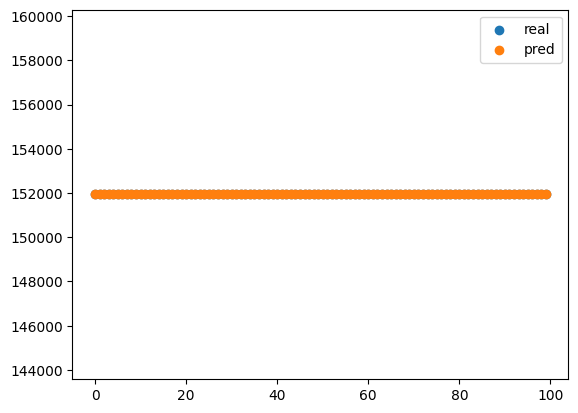

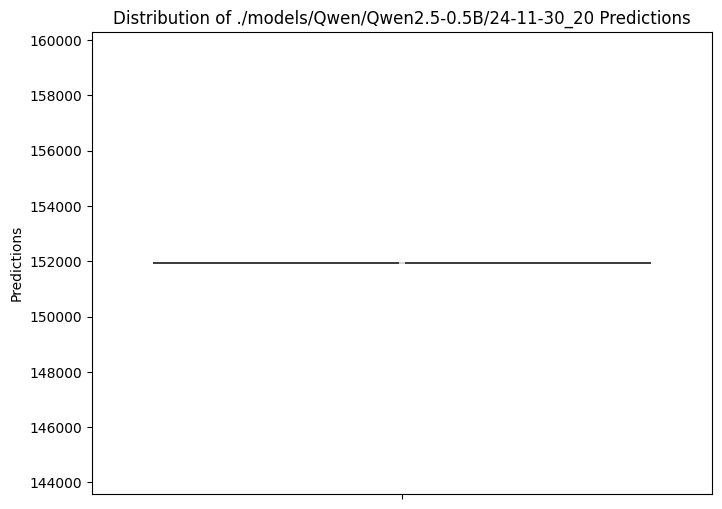

real: shape: torch.Size([100]), goal val: 151935.0
min: 151935.0, max: 151935.0, mean: 151935.0, std: 0.0


 10%|█         | 10/100 [00:23<03:28,  2.32s/it]
Both `max_new_tokens` (=32) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


r2: 0.0
mse: tensor(2.0268e+10)
[16 17 18 19 10 11 12 13 14 15 16 17 18 19 10 11 12 13 14 15 16 17 18 19
 10 11 12 13 14 15 16 17]
[12.454514 19.00006  12.545441 12.545441 19.00006  19.00006  12.636309
 12.636309 19.00006  12.636309 12.636309 19.00006  12.727237 12.727237
 19.00006  12.818165 12.818165 12.818165 19.00006  12.909033 12.909033
 12.909033 19.00006  12.99996  12.99996  12.99996  19.00006  13.090888
 13.090888 13.090888 19.00006  13.181816]


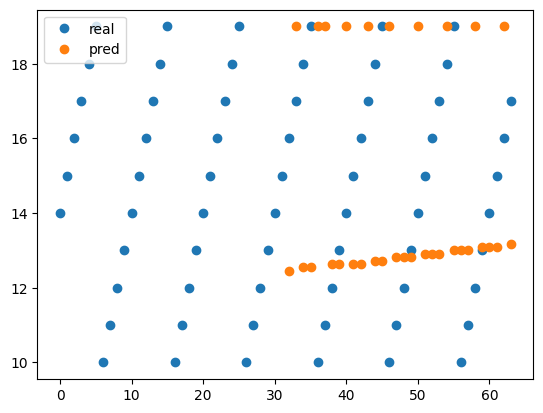

### medium ###


Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


max_position_embeddings
Max length: 1024
Vocab size: 151936
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([ 33763, 151935,  50644, ...,  33763, 151935,  50644]), 'labels': array([151935,  50644, 151935, ..., 151935,  50644, 151935])}
torch.Size([1, 1024]) tensor([[ 33763, 151935,  50644,  ..., 151935,  50644, 151935]],
       device='mps:0')
start
real tensor([151935,  50644, 151935,  67526, 151935,  84407, 151935, 101289, 151935,
        118170, 151935, 135052, 151935, 151934, 151935,      0, 151935,  16881,
        151935,  33763, 151935,  50644, 151935,  67526, 151935,  84407, 151935,
        101289, 151935, 118170, 151935, 135052], device='mps:0')
pred tensor([151935,  50644, 151935,  67526, 151935,  84407, 151935, 101289, 151935,
        118170, 151935, 135052, 151935, 151934, 151935,      0, 151935,  16881,
        151935,  33763, 151935,  50644, 151935,  67526, 151935,  84407, 151935,
        101289, 151935, 11817

 10%|█         | 10/100 [00:24<03:41,  2.46s/it]


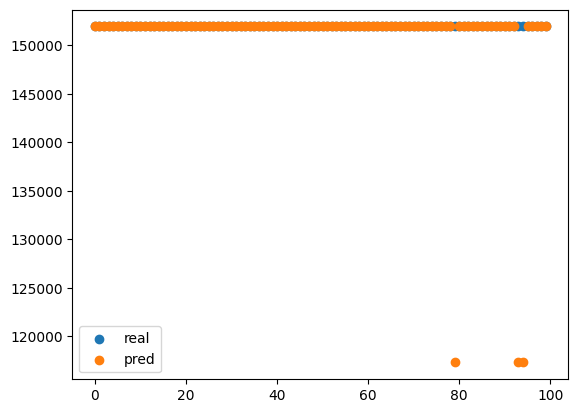

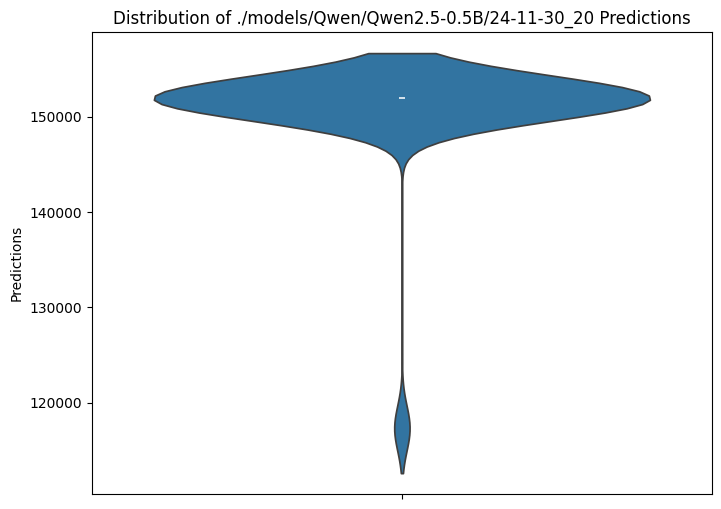

real: shape: torch.Size([100]), goal val: 151935.0
min: 117323.0, max: 151935.0, mean: 150896.640625, std: 5934.10986328125


 10%|█         | 10/100 [00:23<03:35,  2.39s/it]
Both `max_new_tokens` (=32) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


r2: 0.0
mse: tensor(1.9426e+10)
[16 17 18 19 10 11 12 13 14 15 16 17 18 19 10 11 12 13 14 15 16 17 18 19
 10 11 12 13 14 15 16 17]
[16.999947 19.00006  17.090876 17.090876 19.00006  19.00006  17.181803
 17.181803 19.00006  17.27267  17.27267  19.00006  17.363598 17.363598
 19.00006  17.363598 17.454527 19.00006  17.454527 17.545454 19.00006
 17.545454 17.545454 19.00006  17.636322 17.636322 17.636322 19.00006
 17.72725  17.72725  17.72725  19.00006 ]


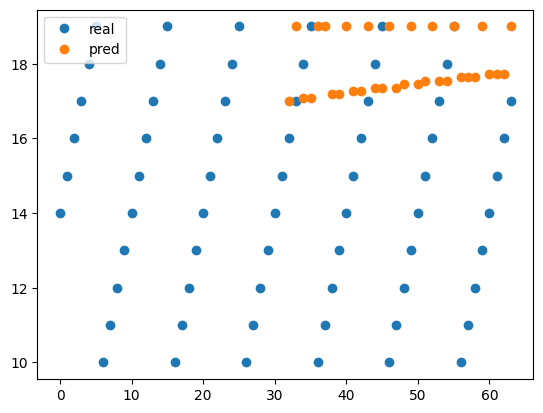

### hard ###


Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


max_position_embeddings
Max length: 1024
Vocab size: 151936
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([ 33763, 151935,  50644, ...,  33763, 151935,  50644]), 'labels': array([151935,  50644, 151935, ..., 151935,  50644, 151935])}
torch.Size([1, 1024]) tensor([[ 33763, 151935,  50644,  ..., 151935,  50644, 151935]],
       device='mps:0')
start
real tensor([151935,  50644, 151935,  67526, 151935,  84407, 151935, 101289, 151935,
        118170, 151935, 135052, 151935, 151934, 151935,      0, 151935,  16881,
        151935,  33763, 151935,  50644, 151935,  67526, 151935,  84407, 151935,
        101289, 151935, 118170, 151935, 135052], device='mps:0')
pred tensor([151935,  50644, 151935,  67526, 151935,  84407, 151935, 101289, 151935,
        118170, 151935, 135052, 151935, 151934, 151935,      0, 151935,  16881,
        151935,  33763, 151935,  50644, 151935,  67526, 151935,  84407, 151935,
        101289, 151935, 11817

 10%|█         | 10/100 [00:23<03:34,  2.39s/it]


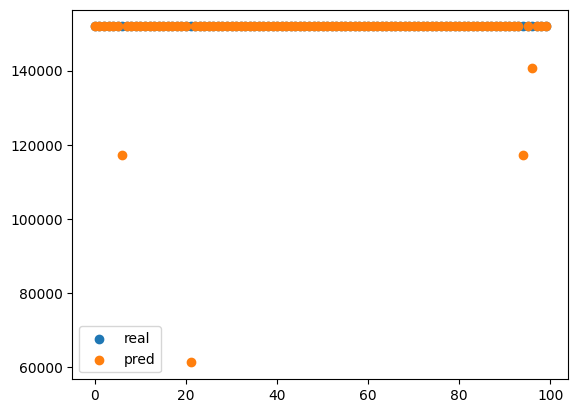

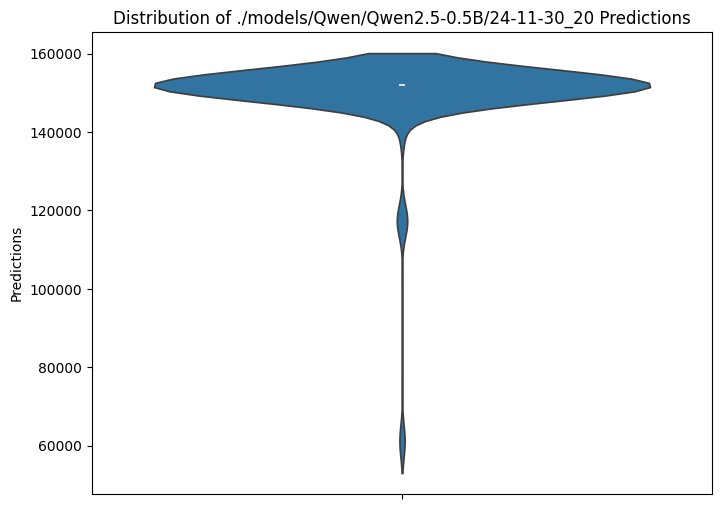

real: shape: torch.Size([100]), goal val: 151935.0
min: 61195.0, max: 151935.0, mean: 150223.296875, std: 10280.0732421875


 10%|█         | 10/100 [00:24<03:37,  2.41s/it]
Both `max_new_tokens` (=32) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


r2: 0.0
mse: tensor(1.9812e+10)
[16 17 18 19 10 11 12 13 14 15 16 17 18 19 10 11 12 13 14 15 16 17 18 19
 10 11 12 13 14 15 16 17]
[16.999947 19.00006  17.090876 17.090876 17.090876 19.00006  17.181803
 17.181803 17.181803 19.00006  17.27267  17.27267  17.27267  19.00006
 17.363598 17.363598 17.363598 19.00006  17.454527 17.454527 17.454527
 19.00006  17.545454 17.545454 17.545454 19.00006  17.636322 17.636322
 17.636322 19.00006  17.72725  17.72725 ]


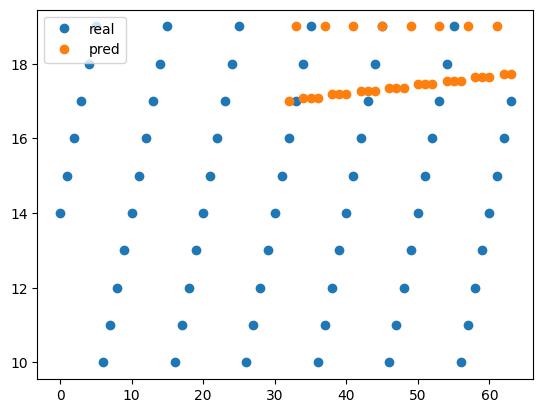

In [63]:
model_path = 'Qwen/Qwen2.5-0.5B'
# get latest folder in models
files = sorted([ f"./models/{model_path}/{f}" for f in os.listdir(f"./models/{model_path}") ])
latest = max(files, key=os.path.getmtime)
# latest = f"./models/{model_path}/24-11-28_21"
# latest = "./models/Qwen/Qwen2.5-0.5B/24-11-28_21"
latest = "./models/Qwen/Qwen2.5-0.5B/24-11-30_20"
# latest = "./models/gpt2/24-11-28_16"
# latest = "./models/gpt2/24-11-30_22"
print(latest)

# easy
print('### easy ###')
input_files = [ 'raw_data/train_001_10-20.csv' ]
generated_text = test_model(latest, input_files=input_files)

# medium
print('### medium ###')
input_files = [ 'raw_data/004_apple.csv' ]
generated_text = test_model(latest, input_files=input_files)

# hard
print('### hard ###')
input_files = [ 'raw_data/004_city-temperature.csv' ]
generated_text = test_model(latest, input_files=input_files)

In [ ]:
# https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production
# https://www.kaggle.com/datasets/vislupus/vegetable-and-fruit-prices
# https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

In [ ]:
# gpt: 24-11-28_16: bad
# gpt: 24-11-30_22: good
# qwen: 24-11-30_20: good
# qwen: 24-12-01_11: meh (2k window)